In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
ml_train_df=pd.read_csv("C:/Users/kiran/Downloads/train-3 (1).csv")
ml_test_df=pd.read_csv("C:/Users/kiran/Downloads/test-4 (1).csv")

In [2]:
ml_test_df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,1,1,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,FLU
1,1,0,1,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,FLU
2,0,1,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,FLU
3,0,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,FLU
4,1,0,1,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,FLU


In [3]:
ml_train_df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,1,0,1,1,0,1,0,0,0,0,...,0,1,1,1,1,1,0,1,1,ALLERGY
1,1,1,0,0,1,0,0,0,1,1,...,1,1,1,0,0,0,0,1,0,FLU
2,1,1,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,ALLERGY
3,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,FLU
4,1,0,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,1,0,FLU


In [4]:
ml_test_df.columns

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')

In [5]:
ml_train_df.columns

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')

In [6]:
ml_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40007 entries, 0 to 40006
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 40007 non-null  int64 
 1   MUSCLE_ACHES          40007 non-null  int64 
 2   TIREDNESS             40007 non-null  int64 
 3   SORE_THROAT           40007 non-null  int64 
 4   RUNNY_NOSE            40007 non-null  int64 
 5   STUFFY_NOSE           40007 non-null  int64 
 6   FEVER                 40007 non-null  int64 
 7   NAUSEA                40007 non-null  int64 
 8   VOMITING              40007 non-null  int64 
 9   DIARRHEA              40007 non-null  int64 
 10  SHORTNESS_OF_BREATH   40007 non-null  int64 
 11  DIFFICULTY_BREATHING  40007 non-null  int64 
 12  LOSS_OF_TASTE         40007 non-null  int64 
 13  LOSS_OF_SMELL         40007 non-null  int64 
 14  ITCHY_NOSE            40007 non-null  int64 
 15  ITCHY_EYES            40007 non-null

In [7]:
ml_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 4446 non-null   int64 
 1   MUSCLE_ACHES          4446 non-null   int64 
 2   TIREDNESS             4446 non-null   int64 
 3   SORE_THROAT           4446 non-null   int64 
 4   RUNNY_NOSE            4446 non-null   int64 
 5   STUFFY_NOSE           4446 non-null   int64 
 6   FEVER                 4446 non-null   int64 
 7   NAUSEA                4446 non-null   int64 
 8   VOMITING              4446 non-null   int64 
 9   DIARRHEA              4446 non-null   int64 
 10  SHORTNESS_OF_BREATH   4446 non-null   int64 
 11  DIFFICULTY_BREATHING  4446 non-null   int64 
 12  LOSS_OF_TASTE         4446 non-null   int64 
 13  LOSS_OF_SMELL         4446 non-null   int64 
 14  ITCHY_NOSE            4446 non-null   int64 
 15  ITCHY_EYES            4446 non-null   

In [8]:
print("Training Data Shape:",ml_train_df.shape)

Training Data Shape: (40007, 21)


In [9]:
print("Test Data Shape:",ml_test_df.shape)

Test Data Shape: (4446, 21)


In [10]:
print("Training Data Summary:\n",ml_train_df.describe())

Training Data Summary:
               COUGH  MUSCLE_ACHES     TIREDNESS   SORE_THROAT    RUNNY_NOSE  \
count  40007.000000  40007.000000  40007.000000  40007.000000  40007.000000   
mean       0.521709      0.520559      0.518509      0.519034      0.496113   
std        0.499535      0.499583      0.499664      0.499644      0.499991   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      1.000000      1.000000      1.000000      0.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        STUFFY_NOSE         FEVER        NAUSEA      VOMITING      DIARRHEA  \
count  40007.000000  40007.000000  40007.000000  40007.000000  40007.000000   
mean       0.495488      0.323943      0.324518      0.324143      0.323168   
std        0.499986      0.

In [11]:
print("Class Distribution:\n", ml_train_df['TYPE'].value_counts())

Class Distribution:
 FLU        22499
ALLERGY    14729
COVID       1849
COLD         930
Name: TYPE, dtype: int64


<AxesSubplot:xlabel='TYPE', ylabel='count'>

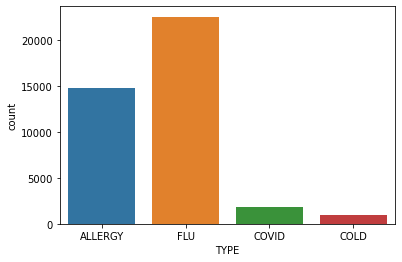

In [12]:
sns.countplot(data=ml_train_df,x="TYPE")

(<module 'numpy' from 'C:\\Users\\kiran\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>,
 FLU        56.238
 ALLERGY    36.816
 COVID       4.622
 COLD        2.325
 Name: TYPE, dtype: float64)

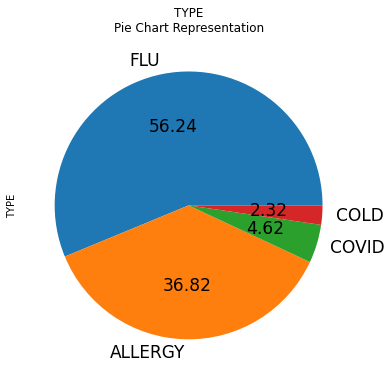

In [13]:
def piechart(df,variable):
    PieChart = df[variable].value_counts()
    length_axis=PieChart.plot.pie(figsize=(6,7),autopct="%1.2f",fontsize=17)
    length_axis.set_title(variable+"\n"+"Pie Chart Representation",fontsize=12)
    return np,round(PieChart/df.shape[0]*100,3)
piechart(ml_train_df,"TYPE")

In [14]:
lae=LabelEncoder()
ml_train_df['TYPE']=lae.fit_transform(ml_train_df['TYPE'])
ml_test_df['TYPE']=lae.transform(ml_test_df['TYPE'])
lae.classes_

array(['ALLERGY', 'COLD', 'COVID', 'FLU'], dtype=object)

In [15]:
x_train=ml_train_df.drop(columns=['TYPE'])
y_train=ml_train_df['TYPE']
x_test=ml_test_df.drop(columns=['TYPE'])
y_test=ml_test_df['TYPE']

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
print("Class Distribution:\n", ml_train_df['TYPE'].value_counts())

Class Distribution:
 3    22499
0    14729
2     1849
1      930
Name: TYPE, dtype: int64


In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train_scaled, y_train)

In [19]:
train_resampled_df = pd.DataFrame(x_resampled, columns=x_train.columns)
train_resampled_df['TYPE'] = y_resampled

In [20]:
print("Resampled Class Distribution:\n", train_resampled_df['TYPE'].value_counts())

Resampled Class Distribution:
 0    22499
3    22499
2    22499
1    22499
Name: TYPE, dtype: int64


In [21]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier(random_state=42)
DecisionTreeClassifier.fit(x_resampled,y_resampled)
DecisionTreeClassifier_prediction =DecisionTreeClassifier.predict(x_test_scaled)

In [22]:
print("Accuracy score of decision tree Model :",accuracy_score(y_test,DecisionTreeClassifier_prediction)*100)

Accuracy score of decision tree Model : 87.22447143499775


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
decision_confusion_matrix=(confusion_matrix(y_test,DecisionTreeClassifier_prediction))
print("Confusion Matrix of Decision Tree Model\n-------------------\n",decision_confusion_matrix)

Confusion Matrix of Decision Tree Model
-------------------
 [[1598   51    0    3]
 [  42   24    3   25]
 [   1    5   14  179]
 [  24   28  207 2242]]


In [24]:
print("F1 score of Decision tree Model :",f1_score(y_test,DecisionTreeClassifier_prediction,average="weighted")*100)

F1 score of Decision tree Model : 87.55732446189599


In [25]:
print("Classification report of decision Model\n----------------------------------------------------\n"+ classification_report(y_test,DecisionTreeClassifier_prediction))

Classification report of deision Model
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1652
           1       0.22      0.26      0.24        94
           2       0.06      0.07      0.07       199
           3       0.92      0.90      0.91      2501

    accuracy                           0.87      4446
   macro avg       0.54      0.55      0.54      4446
weighted avg       0.88      0.87      0.88      4446



In [26]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(x_resampled, y_resampled)
svm_predictions = svm.predict(x_test_scaled)

In [27]:
print("Accuracy score of svm Model :",accuracy_score(y_test,svm_predictions)*100)

Accuracy score of svm Model : 92.60008996851103


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_confusion_matrix=(confusion_matrix(y_test,svm_predictions))
print("Confusion Matrix of SVM Tree Model\n-------------------\n",svm_confusion_matrix)

Confusion Matrix of SVM Tree Model
-------------------
 [[1595   57    0    0]
 [   0   94    0    0]
 [   0    6  193    0]
 [   0   53  213 2235]]


In [29]:
print("F1 score of SVM Model :",f1_score(y_test,svm_predictions,average="weighted")*100)

F1 score of SVM Model : 93.76128077676745


In [30]:
print("Classification report of SVM Model\n----------------------------------------------------\n"+ classification_report(y_test,svm_predictions))

Classification report of SVM Model
----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1652
           1       0.45      1.00      0.62        94
           2       0.48      0.97      0.64       199
           3       1.00      0.89      0.94      2501

    accuracy                           0.93      4446
   macro avg       0.73      0.96      0.80      4446
weighted avg       0.96      0.93      0.94      4446



In [31]:
pca = PCA(n_components=2)
x_resampled_pca = pca.fit_transform(x_resampled)

In [32]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=4,max_iter=200,random_state=42)
Kmeans_labels =Kmeans.fit_predict(x_resampled_pca)
cluster_centers=Kmeans.cluster_centers_

Text(0, 0.5, 'PCA Component 2')

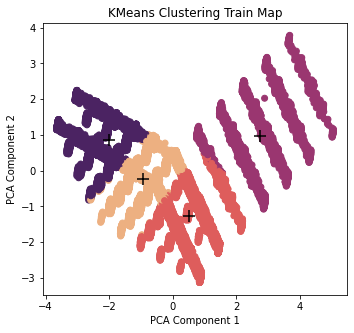

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_resampled_pca[:,0],x_resampled_pca[:,1],c=Kmeans_labels,cmap="flare")
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],color="black",marker="+",s=150)
plt.title("KMeans Clustering Train Map")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

In [41]:
silhouette_avg_kmeans = silhouette_score(x_resampled_pca, Kmeans_labels)
print("Silhouette Score for Kmeans ",silhouette_avg_kmeans)

Silhouette Score for Kmeans  0.42734288936430675


In [35]:
from sklearn.metrics import adjusted_rand_score
ari_score_kmeans = adjusted_rand_score(y_resampled, Kmeans_labels)
print("Adjusted Rand Index:",ari_score_kmeans)

Adjusted Rand Index: 0.5455547960772029


In [36]:
gmm = GaussianMixture(n_components=len(np.unique(y_resampled)), random_state=42)
gmm.fit(x_resampled_pca)

GaussianMixture(n_components=4, random_state=42)

In [37]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(x_resampled_pca)
cluster_centers = gmm.means_

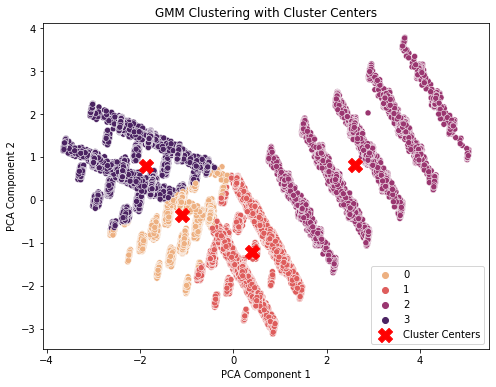

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_resampled_pca[:, 0], y=x_resampled_pca[:, 1], hue=gmm_labels, palette="flare", legend="full")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Cluster Centers', marker='X')
plt.title("GMM Clustering with Cluster Centers")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In [39]:
silhouette_avg_gaussian = silhouette_score(x_resampled_pca, gmm_labels)
print("Silhouette Score for GMM ",silhouette_avg_gaussian)

Silhouette Score for GMM  0.4014092180922123


In [40]:
from sklearn.metrics import adjusted_rand_score
ari_score_gaussian = adjusted_rand_score(y_resampled, gmm_labels)
print("Adjusted Rand Index:",ari_score_gaussian)

Adjusted Rand Index: 0.6510840128646928
